In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as stats
import seaborn as sns
from typing import Dict, Tuple
import warnings
import random

%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', -1)
pd.options.display.max_rows = 999

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('AMI_GSE66360_series_matrix.csv', header= None)

##  Pre-processed

In [4]:
df_gens = df[59:].transpose()
df_gens = df_gens.rename(columns=df_gens.iloc[0])
df_gens = df_gens[1:]

<AxesSubplot:>

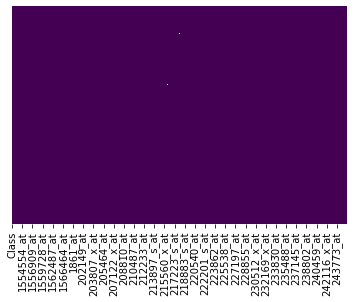

In [6]:
sns.heatmap(df_gens.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
df_gens.dtypes

Class              object
ID_REF             object
1007_s_at          object
1053_at            object
117_at             object
                    ...  
AFFX-ThrX-5_at     object
AFFX-ThrX-M_at     object
AFFX-TrpnX-3_at    object
AFFX-TrpnX-5_at    object
AFFX-TrpnX-M_at    object
Length: 54677, dtype: object

In [9]:
df_gens.head()

,Class,ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,1438_at,1487_at,1494_f_at,1552256_a_at,1552257_a_at,1552258_at,1552261_at,1552263_at,1552264_a_at,1552266_at,1552269_at,1552271_at,1552272_a_at,1552274_at,1552275_s_at,1552276_a_at,1552277_a_at,1552278_a_at,1552279_a_at,1552280_at,1552281_at,1552283_s_at,1552286_at,1552287_s_at,1552288_at,1552289_a_at,1552291_at,1552293_at,1552295_a_at,1552296_at,1552299_at,1552301_a_at,1552302_at,1552303_a_at,1552304_at,1552306_at,1552307_a_at,1552309_a_at,1552310_at,1552311_a_at,1552312_a_at,1552314_a_at,1552315_at,1552316_a_at,1552318_at,1552319_a_at,1552320_a_at,1552321_a_at,1552322_at,1552323_s_at,1552325_at,1552326_a_at,1552327_at,1552329_at,1552330_at,1552332_at,1552334_at,1552335_at,1552337_s_at,1552338_at,1552340_at,1552343_s_at,1552344_s_at,1552347_at,1552348_at,1552349_a_at,1552354_at,1552355_s_at,1552359_at,1552360_a_at,1552362_a_at,1552364_s_at,1552365_at,1552367_a_at,1552368_at,1552370_at,1552372_at,1552373_s_at,1552375_at,1552377_s_at,1552378_s_at,1552379_at,1552381_at,1552383_at,1552384_a_at,1552386_at,1552388_at,1552389_at,1552390_a_at,1552391_at,1552393_at,1552394_a_at,1552395_at,1552396_at,1552398_a_at,1552399_a_at,1552400_a_at,1552401_a_at,1552402_at,1552405_at,1552408_at,1552409_a_at,1552410_at,1552411_at,1552412_a_at,1552414_at,1552415_a_at,1552417_a_at,1552418_at,1552419_s_at,1552421_a_at,1552422_at,1552423_at,1552424_at,1552425_a_at,1552426_a_at,1552427_at,1552430_at,1552432_at,1552436_a_at,1552438_a_at,1552439_s_at,1552440_at,1552445_a_at,1552448_a_at,1552449_a_at,1552450_a_at,1552452_at,1552453_a_at,1552455_at,1552456_a_at,1552457_a_at,1552458_at,1552459_a_at,1552461_at,1552463_at,1552466_x_at,1552467_at,1552468_a_at,1552470_a_at,1552472_a_at,1552473_at,1552474_a_at,1552476_s_at,1552477_a_at,1552478_a_at,1552480_s_at,1552481_s_at,1552482_at,1552484_at,1552485_at,1552486_s_at,1552487_a_at,1552489_s_at,1552490_at,1552491_at,1552493_s_at,1552494_at,1552496_a_at,1552497_a_at,1552498_at,1552499_a_at,1552501_a_at,1552502_s_at,1552503_at,1552504_a_at,1552506_at,1552507_at,1552508_at,1552509_a_at,1552510_at,1552511_a_at,1552514_at,1552515_at,1552516_a_at,1552518_s_at,1552519_at,1552520_at,1552521_a_at,1552522_at,1552523_a_at,1552524_at,1552526_at,1552528_at,1552531_a_at,1552532_a_at,1552535_at,1552536_at,1552538_a_at,1552540_s_at,1552541_at,1552542_s_at,1552543_a_at,1552544_at,1552546_a_at,1552548_at,1552549_a_at,1552552_s_at,1552553_a_at,1552554_a_at,1552555_at,1552557_a_at,1552558_a_at,1552559_a_at,1552562_at,1552563_a_at,1552564_at,1552566_at,1552568_at,1552569_a_at,1552570_at,1552572_a_at,1552573_s_at,1552575_a_at,1552576_at,1552578_a_at,1552579_a_at,1552580_at,1552582_at,1552583_s_at,1552584_at,1552585_s_at,1552586_at,1552587_at,1552588_a_at,1552590_a_at,1552592_at,1552594_at,1552596_at,1552598_at,1552599_at,1552602_at,1552604_at,1552605_s_at,1552607_at,1552608_at,1552609_s_at,1552610_a_at,...,46947_at,47069_at,47083_at,47105_at,47530_at,47550_at,47553_at,47560_at,47571_at,47608_at,47773_at,48030_i_at,48031_r_at,48106_at,48117_at,48531_at,48580_at,48612_at,48659_at,48808_at,48825_at,49049_at,49051_g_at,49077_at,49111_at,49306_at,49327_at,49329_at,49452_at,49485_at,49679_s_at,49878_at,50221_at,50277_at,50314_i_at,50374_at,50376_at,50400_at,50965_at,51146_at,51158_at,51176_at,51192_at,51200_at,51226_at,51228_at,51774_s_at,52005_at,52078_at,52159_at,52164_at,52169_at,52255_s_at,52285_f_at,52651_at,52731_at,52741_at,52837_at,52940_at,52975_at,53071_s_at,53076_at,53202_at,53720_at,53912_at,53968_at,53987_at,53991_at,54037_at,54051_at,54632_at,54970_at,55065_at,55081_at,55093_at,55583_at,55616_at,55662_at,55692_at,55705_at,55872_at,56197_at,56256_at,564_at,56748_at,56821_at,56829_at,56919_at,57082_at,57163_at,57516_at,57532_at,57539_at,57540_at,57588_at,57703_at,57715_at,57739_at,58308_at,58367_s_at,58696_at,58780_s_at,58900_at,58916_at,58994_at,59375_at,59433_at,59437_at,59625_at,59631_at,59644_at,59697_at,59705_at,59999_at,60084

In [18]:
df_gens.to_csv('AMI_GSE66360_after_preprocess.csv',index=False)

## Analysis

### A - High level description of the data and some pre-processing

In [19]:
df = pd.read_csv('AMI_GSE66360_after_preprocess.csv')

##### 1) How many genes profiled?

In [20]:
print("There are {} genes profiles - each represented by a column".format(df.shape[0]))

There are 99 genes profiles - each represented by a column


##### 2) How many samples (subjects/patients) in total?

In [21]:
print("There are {} samples - each represented by a row".format(df.shape[1]))

There are 54677 samples - each represented by a row


##### 3) How many samples in each class?

In [22]:
print("In class H (Healthy) here are {} samples\nIn class M (Myocardial) here are {} samples\n"
      .format(df[df["Class"] == 'H'].shape[0],
              df[df["Class"] == 'M'].shape[0]))

In class H (Healthy) here are 50 samples
In class M (Myocardial) here are 49 samples



##### 4) If there are missing values, then remove the entire row (gene) from the data matrix.How many rows left now?

In [23]:
df.dropna(axis='columns', inplace=True) # Removing columns (columns represent genes) with missing values

In [43]:
print("After removeing null ,There are {} genes profiles - each represented by a column".format(df.shape[0]))
print("After removeing null ,There are {} samples - each represented by a row".format(df.shape[1]))

After removeing null ,There are 99 genes profiles - each represented by a column
After removeing null ,There are 54630 samples - each represented by a row


In [24]:
df.head()

,Class,ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,1438_at,1487_at,1494_f_at,1552256_a_at,1552257_a_at,1552258_at,1552261_at,1552263_at,1552264_a_at,1552266_at,1552269_at,1552271_at,1552272_a_at,1552274_at,1552275_s_at,1552276_a_at,1552277_a_at,1552278_a_at,1552279_a_at,1552280_at,1552281_at,1552283_s_at,1552286_at,1552287_s_at,1552288_at,1552289_a_at,1552291_at,1552293_at,1552295_a_at,1552296_at,1552299_at,1552301_a_at,1552302_at,1552303_a_at,1552304_at,1552306_at,1552309_a_at,1552310_at,1552311_a_at,1552312_a_at,1552314_a_at,1552315_at,1552316_a_at,1552318_at,1552319_a_at,1552320_a_at,1552321_a_at,1552322_at,1552323_s_at,1552325_at,1552326_a_at,1552327_at,1552329_at,1552330_at,1552332_at,1552334_at,1552335_at,1552337_s_at,1552338_at,1552340_at,1552343_s_at,1552344_s_at,1552347_at,1552348_at,1552349_a_at,1552354_at,1552355_s_at,1552359_at,1552360_a_at,1552362_a_at,1552364_s_at,1552365_at,1552367_a_at,1552368_at,1552370_at,1552372_at,1552373_s_at,1552375_at,1552377_s_at,1552378_s_at,1552379_at,1552381_at,1552383_at,1552384_a_at,1552386_at,1552388_at,1552389_at,1552390_a_at,1552391_at,1552393_at,1552394_a_at,1552395_at,1552396_at,1552398_a_at,1552399_a_at,1552400_a_at,1552401_a_at,1552402_at,1552405_at,1552408_at,1552409_a_at,1552410_at,1552411_at,1552412_a_at,1552414_at,1552415_a_at,1552417_a_at,1552418_at,1552419_s_at,1552421_a_at,1552422_at,1552423_at,1552424_at,1552425_a_at,1552426_a_at,1552427_at,1552430_at,1552432_at,1552436_a_at,1552438_a_at,1552439_s_at,1552440_at,1552445_a_at,1552448_a_at,1552449_a_at,1552450_a_at,1552452_at,1552453_a_at,1552455_at,1552456_a_at,1552457_a_at,1552458_at,1552459_a_at,1552461_at,1552463_at,1552466_x_at,1552467_at,1552468_a_at,1552470_a_at,1552472_a_at,1552473_at,1552474_a_at,1552476_s_at,1552477_a_at,1552478_a_at,1552480_s_at,1552481_s_at,1552482_at,1552484_at,1552485_at,1552486_s_at,1552487_a_at,1552489_s_at,1552490_at,1552491_at,1552493_s_at,1552494_at,1552496_a_at,1552497_a_at,1552498_at,1552499_a_at,1552501_a_at,1552502_s_at,1552503_at,1552504_a_at,1552506_at,1552507_at,1552509_a_at,1552510_at,1552511_a_at,1552514_at,1552515_at,1552516_a_at,1552518_s_at,1552519_at,1552520_at,1552521_a_at,1552522_at,1552523_a_at,1552524_at,1552526_at,1552528_at,1552531_a_at,1552532_a_at,1552535_at,1552536_at,1552538_a_at,1552540_s_at,1552541_at,1552542_s_at,1552543_a_at,1552544_at,1552546_a_at,1552548_at,1552549_a_at,1552552_s_at,1552553_a_at,1552554_a_at,1552555_at,1552557_a_at,1552558_a_at,1552559_a_at,1552562_at,1552563_a_at,1552564_at,1552566_at,1552568_at,1552569_a_at,1552570_at,1552572_a_at,1552573_s_at,1552575_a_at,1552576_at,1552578_a_at,1552579_a_at,1552580_at,1552582_at,1552583_s_at,1552584_at,1552585_s_at,1552586_at,1552587_at,1552588_a_at,1552590_a_at,1552592_at,1552594_at,1552596_at,1552598_at,1552599_at,1552602_at,1552604_at,1552605_s_at,1552607_at,1552608_at,1552609_s_at,1552610_a_at,1552611_a_at,1552612_at,...,46947_at,47069_at,47083_at,47105_at,47530_at,47550_at,47553_at,47560_at,47571_at,47608_at,47773_at,48030_i_at,48031_r_at,48106_at,48117_at,48531_at,48580_at,48612_at,48659_at,48808_at,48825_at,49049_at,49051_g_at,49077_at,49111_at,49306_at,49327_at,49329_at,49452_at,49485_at,49679_s_at,49878_at,50221_at,50277_at,50314_i_at,50374_at,50376_at,50400_at,50965_at,51146_at,51158_at,51176_at,51192_at,51200_at,51226_at,51228_at,51774_s_at,52005_at,52078_at,52159_at,52164_at,52169_at,52255_s_at,52285_f_at,52651_at,52731_at,52741_at,52837_at,52940_at,52975_at,53071_s_at,53076_at,53202_at,53720_at,53912_at,53968_at,53987_at,53991_at,54037_at,54051_at,54632_at,54970_at,55065_at,55081_at,55093_at,55583_at,55616_at,55662_at,55692_at,55705_at,55872_at,56197_at,56256_at,564_at,56748_at,56821_at,56829_at,56919_at,57082_at,57163_at,57516_at,57532_at,57539_at,57540_at,57588_at,57703_at,57715_at,57739_at,58308_at,58367_s_at,58696_at,58780_s_at,58900_at,58916_at,58994_at,59375_at,59433_at,59437_at,59625_at,59631_at,59644_at,59697_at,59705_at,59999_at,60084

In [25]:
#convert string to float (done her becuse we cant convert null to float )
df[df.columns[2:]] = df[df.columns[2:]].astype(float) 

#### 5) Pick 20 genes at random. Draw 20 pair boxplots in one figure comparing expression levels of each of these genes in the two classes M and H.

<Figure size 1080x1080 with 0 Axes>

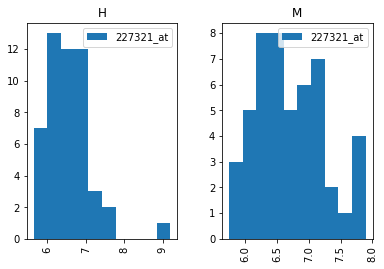

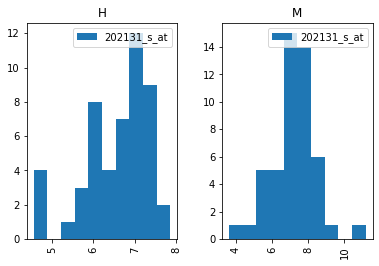

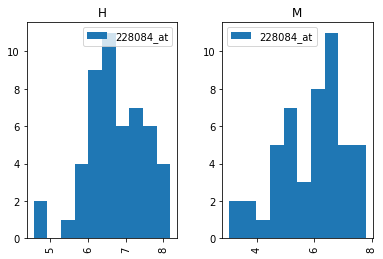

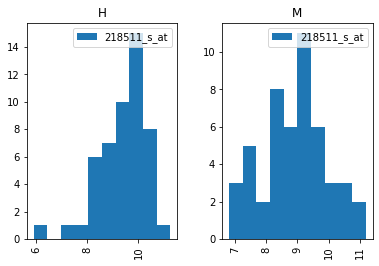

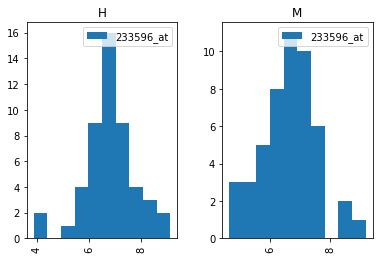

In [135]:
# N_genes = 20

# random_genes = random.sample(list(df.columns[2:]), N_genes)
# fig = plt.figure(figsize = (15,15))

# for n, gene in enumerate(random_genes):
#      df[gene].hist(by=df['Class'], bins=10,legend=True)

<Figure size 1080x1080 with 0 Axes>

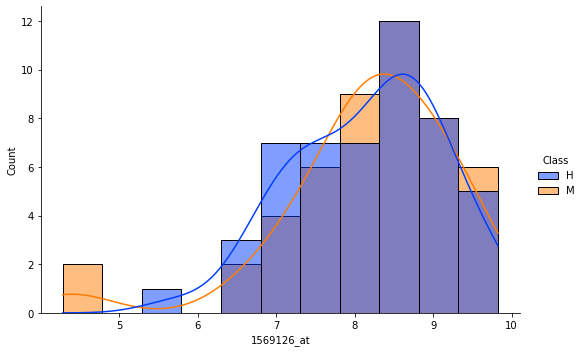

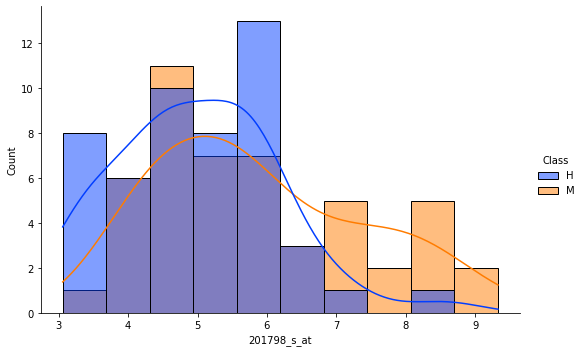

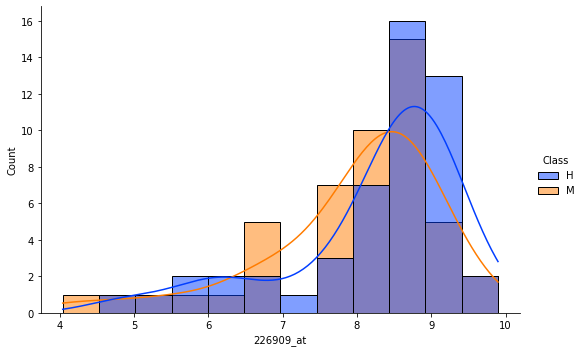

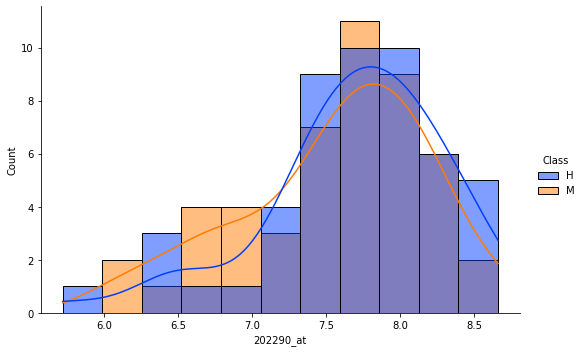

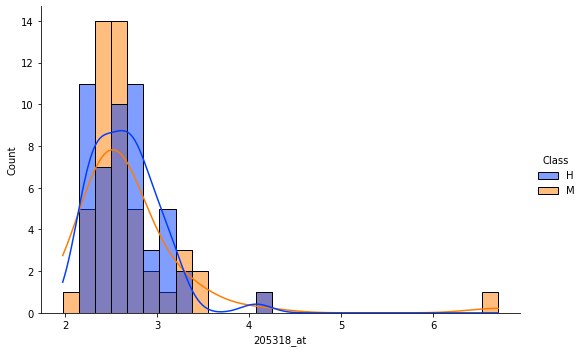

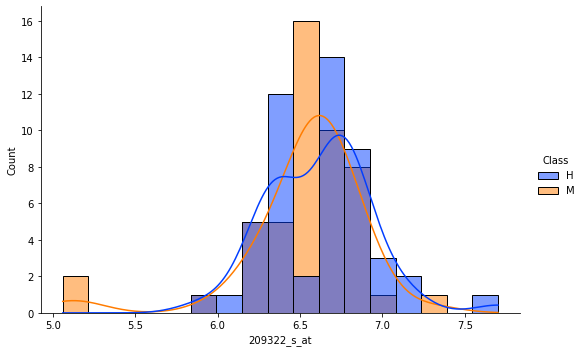

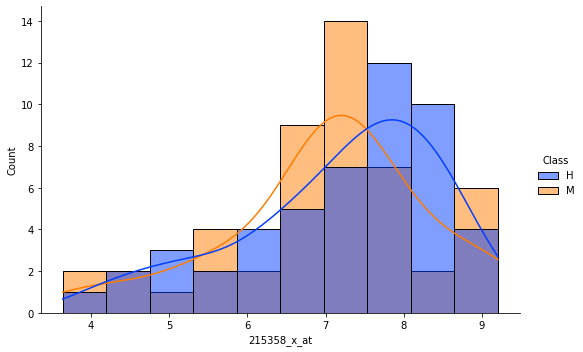

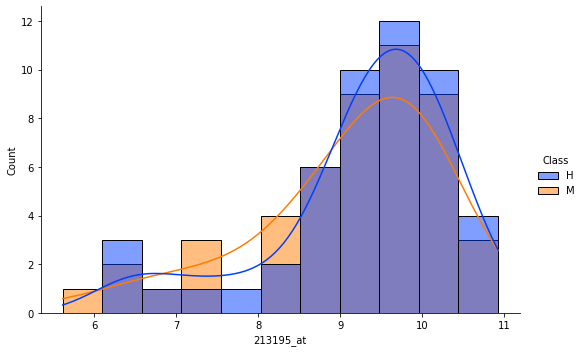

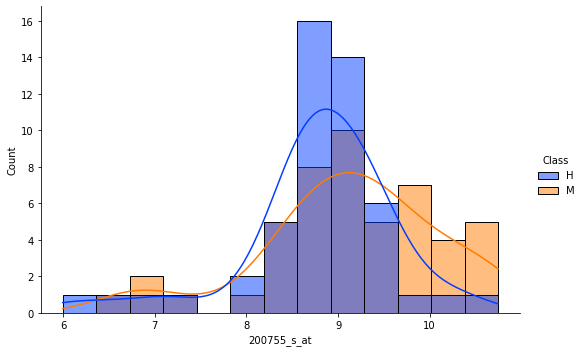

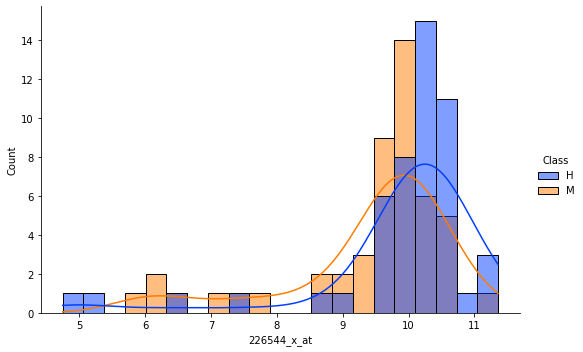

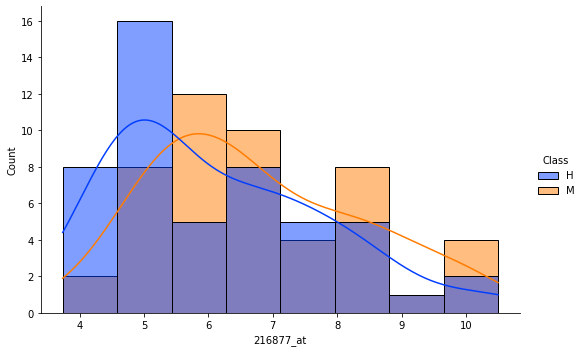

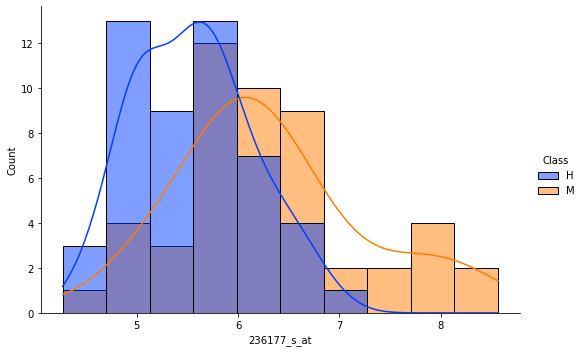

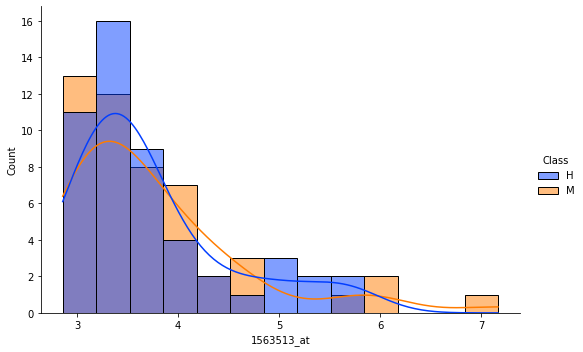

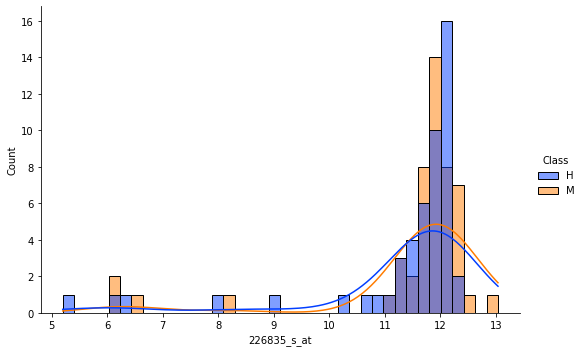

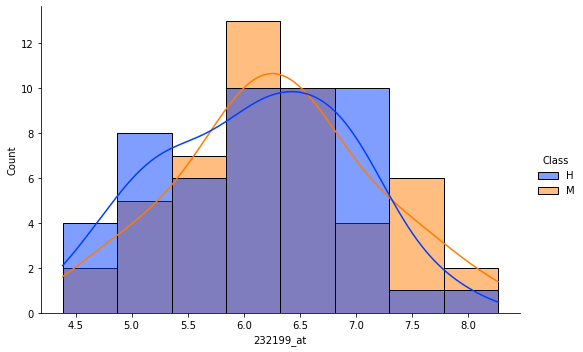

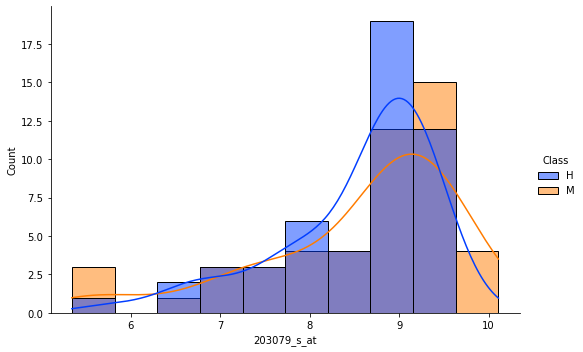

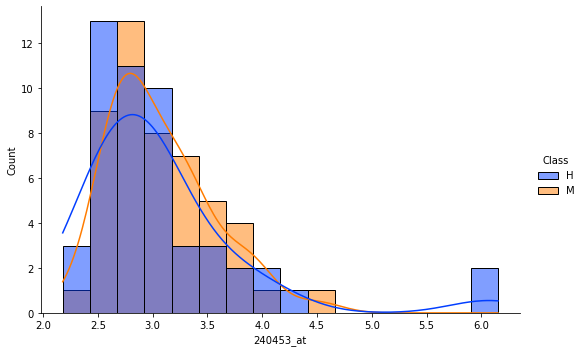

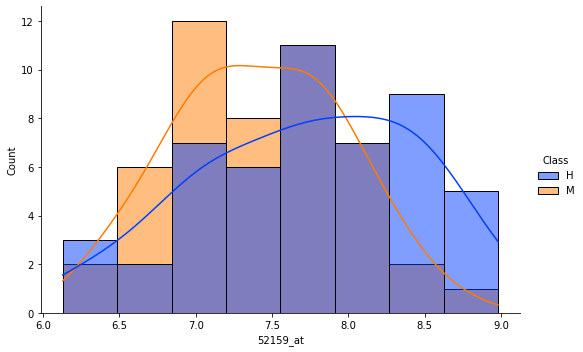

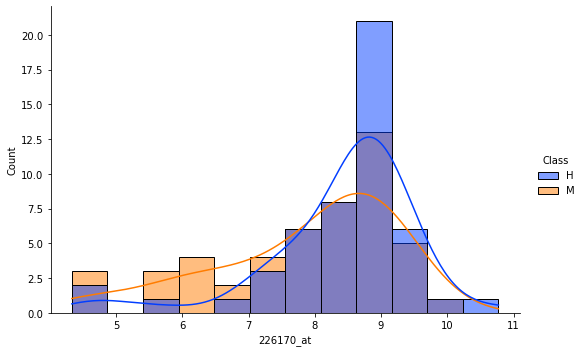

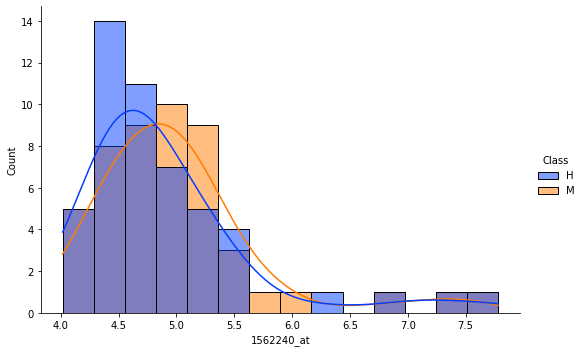

In [145]:
N_genes = 20

random_genes = random.sample(list(df.columns[2:]), N_genes)
fig = plt.figure(figsize = (15,15))

for n, gene in enumerate(random_genes):
    sns.displot(data=df, x=gene, hue='Class', kind='hist',kde=True,palette=sns.color_palette('bright')[:2], height=5, aspect=1.5)

### B. WRS for differential expression (DE)

#### 1)Consider some gene, g. Under the null model (which assumes that for g there is no M vs H DE), what is the expected sum of ranks ofg’s expression levels measured for samples labeled M?

#### 2) Denote this sum of ranks by RS(g). What is the maximal value, c,that RS(g) can take?

#### 3) Under the null model, what is the probability of RS(g) = c? (Provide a formula for this and explain it)

#### 4) Under the null model, what is the probability of RS(g) = c-1? what is the probability of RS(g) = c-2? (Provide formulas and explain them)

#### 5) Draw a histogram of the values of RS(g) in the dataset. Here g ranges over all genes in the data (after the clean-up). Compute theIQR for this distribution and present it on the plot with the histogram.

### C. Differential Expression

#### The purpose is to determine the statistical significance of differential expression (DE) observed for each gene in H vs M. Evaluate the DE in both one-sided directions for every gene,using both Student t-test and WRS test. Report the number of genes overexpressed in M vs H (M > H) at a p-value better (≤) than 0.07 and separately genes underexpressed in M vs H (M < H) at a p-value better than 0.07. For both directions use both a Student t-test and a WRS test.

### D. Correlations
#### Select the 80 most significant genes from each one of the onesided WRS DE lists you computed in 3c. Generate a set of 160 genes, D, which is the union of the above two sets.


#### 1) Compute Kendall 𝜏 correlations in all pairs within D (160 choose 2 numbers). Represent the correlation matrix as a 160x160 heatmap.

#### 2) Under a NULL model that assumes that genes are pairwise independent, what is the expected value for 𝜏?

#### 3) Now compute the Kendall 𝜏 correlations in all 80 choose 2 pairs from the overexpressed genes in D. Present your results on a histogram. What is the average value you observed? Compare it to the value in the above section. Explain.

#### 4) What can you report about co-expression of genes in D (coexpression is inferred from the correlation of the expression levels of genes, across a set of samples)?

#### 5) What can you say about how many co-expressed pairs we would observe (in the entire dataset) at FDR=0.05? Explain your answer.

#### 6) What would have been advantages and disadvantages of computing co-expression for all genes in the study rather than only for genes in D?

### E. Plots and Conclusions of the DE and correlation analysis

#### 1) Construct the DE overabundance plots (blue and green lines as shown in class) for M vs H overexpression (high expression levels in M) using WRS and t-test using the results you had computed in Section 3c. State, for each comparison, the number of genes, k, at whichwe observe:
#### a) FDR = 0.05
#### b) FDR = 0.01
#### c) FDR = 0.005
#### If these events are not observed at any k>0, then make that statement.

#### 2) Select any 3 differentially expressed genes, from D (which was defined in 3d), and produce a graphical representation of their expression patterns that demonstrates the observed DE.

#### 3) Heatmap ,Draw a heatmap representation of the expression values of the genes in D (from 3d), across the entire cohort (all samples). Order the genes and the samples to produce the maximal visual effect.